## Load trainning data for testing neural work from Kaggle digit recognizer dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
with open('C:/Users/levin/Desktop/Digit Recognizer/train.csv', 'r') as f:
    reader = csv.reader(f)
    df_list = list(reader)
len(df_list)

42001

## Convert the datatype to float 

In [11]:
df_array=np.array(df_list[1:]).astype(float)

In [4]:
df = [[d[1:]/255 for d in df_array],[d[0] for d in df_array]]
len(df)

2

## Split data into training data and testing data

In [5]:
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y = train_test_split(df[0],df[1],test_size=.2,random_state = 1)

## Neural Network Class

In [6]:
# This network with sigmoid activation function and cross-entropy cost function is based on the code from Neuralnetwork and 
# Deeplearning book
class network(object):
    
    def __init__(self,size):
        self.size=size
        self.layer=len(size)
        self.w=[np.random.randn(x,y) for x,y in list(zip(size[1:],size[:-1]))]
        self.b=[np.random.randn(y,1) for y in size[1:]]

    def feedforward(self,x):
        a=[np.zeros((s,1)) for s in self.size]
        a[0]=x
        for i in range(self.layer-1):
            z=np.dot(self.w[i],a[i])+self.b[i]
            y=self.sigmoid(z)
            a[i+1]=y
        return a

    def sigmoid(self,x):
        y=1.0/(1.0+np.exp(-x))
        return y

    def sigmoid_prime(self,x):
        y=x*(1-x)
        return y
    
    def backpropagation(self,x,y):
        a=self.feedforward(x)
        rho=[np.zeros(u.shape) for u in a]
        rho[-1]=a[-1]-y
        for l in range(1,self.layer):
            rho[-l-1]=np.dot(self.w[-l].T,rho[-l])*self.sigmoid_prime(a[-l-1]) #compute sigmoid_prime on every element in a[-l-1]
        w_drv=[np.zeros(t2.shape) for t2 in self.w]
        b_drv=[np.zeros(t3.shape) for t3 in self.b]
        for l in range(1,self.layer):
            w_drv[-l]=np.dot(rho[-l],a[-l-1].T)
            b_drv[-l]=rho[-l]
        return w_drv,b_drv
    
    def test(self,x,y):
        a=self.feedforward(x)
        rho=[np.zeros(u.shape) for u in a]
        print (a[-1])
        print (y)
        rho[-1]=a[-1]-y
        print (rho[-1])
  
 

    def update_mini_batch(self,mini_batch,alpha):
        del_w=[np.zeros(w.shape) for w in self.w]
        del_b=[np.zeros(b.shape) for b in self.b]
        for x,y in mini_batch:
            w_,b_=self.backpropagation(x,y)
            del_w=[dw+dw_ for dw,dw_ in list(zip(del_w,w_))]
            del_b=[db+db_ for db,db_ in list(zip(del_b,b_))]
        self.w=[w-alpha*dw/len(mini_batch) for w,dw in list(zip(self.w,del_w))]
        self.b=[b-alpha*db/len(mini_batch) for b,db in list(zip(self.b,del_b))]
    
    def evaluate(self,test_data):
        result=[(np.argmax(self.feedforward(x)[-1]),y) for x,y in test_data]
        return sum((x==y) for x,y in result)
        
    def SGD(self,training_data,epoch,batch_size,alpha,test_data=None):
        if test_data: 
            n_test=len(test_data)
            test_accuracy=[]
        n=len(training_data)
        for j in range(epoch):        
            np.random.shuffle(training_data)
            mini_batches=[training_data[k:k+batch_size] for k in range(0,n,batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,alpha)
            if test_data:
                ptg=float(self.evaluate(test_data))/n_test
                test_accuracy.append(ptg)
                print ("Epoch {0} test accuracy: {1}/{2}".format(j,self.evaluate(test_data),n_test))
            else:
                print ("Epoch {0} completed".format(j))
        if test_data:
            plt.plot(range(epoch),test_accuracy)
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title('Testing accuracy by Neural Network')
            plt.show()
        return (self.w,self.b)
        
        

In [7]:
def vectorized(x):
    y = np.zeros((10,1))
    y[x] = 1.0
    return y

## Reshape data for convenient matrix calculation

In [8]:
tr_x = [np.reshape(x,(784,1)) for x in train_x]
tr_y = [vectorized(y) for y in train_y]
train_data = list(zip(tr_x,tr_y))
te_x = [np.reshape(x,(784,1)) for x in test_x]
test_data = list(zip(te_x,test_y))

C:\Users\levin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


## Initiate neural network with one hidden layer and 100 hidden units

In [9]:
nnet = network([784,100,10])

## Run 50 epochs and plot the learning curve

Epoch 0 test accuracy: 7729/8400
Epoch 1 test accuracy: 7843/8400
Epoch 2 test accuracy: 7926/8400
Epoch 3 test accuracy: 7937/8400
Epoch 4 test accuracy: 8018/8400
Epoch 5 test accuracy: 8008/8400
Epoch 6 test accuracy: 8023/8400
Epoch 7 test accuracy: 8042/8400
Epoch 8 test accuracy: 8051/8400
Epoch 9 test accuracy: 8046/8400
Epoch 10 test accuracy: 8055/8400
Epoch 11 test accuracy: 8053/8400
Epoch 12 test accuracy: 8078/8400
Epoch 13 test accuracy: 8065/8400
Epoch 14 test accuracy: 8059/8400
Epoch 15 test accuracy: 8073/8400
Epoch 16 test accuracy: 8076/8400
Epoch 17 test accuracy: 8068/8400
Epoch 18 test accuracy: 8076/8400
Epoch 19 test accuracy: 8064/8400
Epoch 20 test accuracy: 8073/8400
Epoch 21 test accuracy: 8083/8400
Epoch 22 test accuracy: 8081/8400
Epoch 23 test accuracy: 8077/8400
Epoch 24 test accuracy: 8083/8400
Epoch 25 test accuracy: 8079/8400
Epoch 26 test accuracy: 8084/8400
Epoch 27 test accuracy: 8080/8400
Epoch 28 test accuracy: 8071/8400
Epoch 29 test accuracy: 

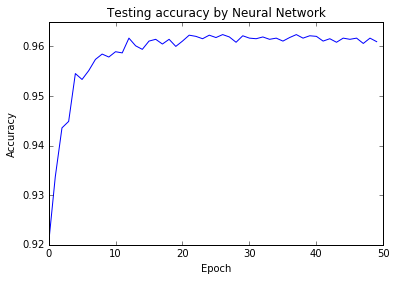

In [10]:
%matplotlib inline
w,b = nnet.SGD(train_data,50,10,.5,test_data=test_data)